# Import

In [1]:
import pandas as pd
import seaborn as sns

# File

In [ ]:
FILE = "results/test_drop3/train_results.csv"

# Read file

In [2]:
df = pd.read_csv(FILE)
df

# Filter

In [7]:
# dff = df
dff = df[df["N_tr"].isin([10, 20, 30, 80, 90, 100])]
# dff = df[df["N_tr"] % 20 == 0]

# Plot

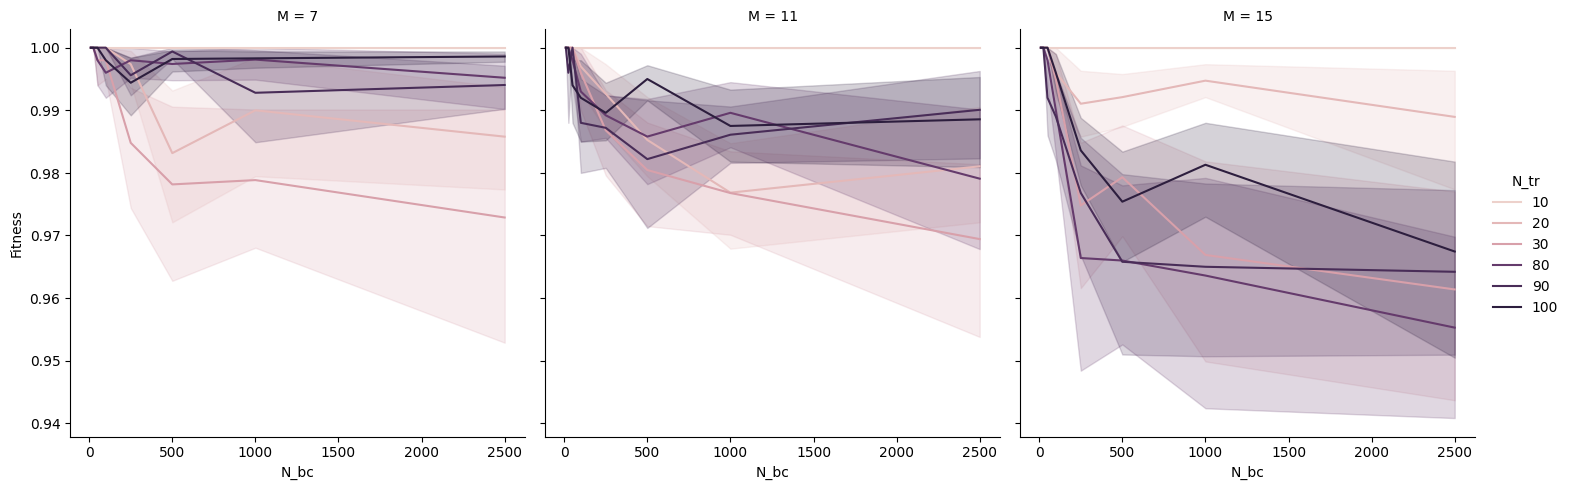

In [8]:
sns.relplot(
    data=dff,#dff[dff["Fitness"] >= 0.75],
    x="N_bc",
    y="Fitness",
    # style="N_tr",
    hue="N_tr",
    col="M",
    # row_order=["1", "2", "3", "4"],
    # col_order=["7", "11", "15"],
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)